In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import os 

In [2]:
data=np.load('data-memory-save.npy')
target=np.load('target-memory-save.npy')

print(data.shape)
print(target.shape)

(24946, 50, 50, 1)
(24946, 2)


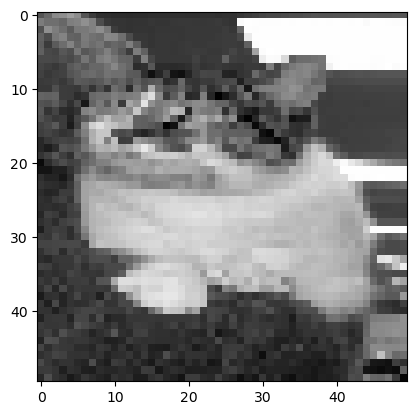

In [3]:
plt.imshow(data[2000],cmap='gray')

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Activation,Dropout,BatchNormalization

model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(50,50,1)))
#model.add(Conv2D(256,(3,3),input_shape=data.shape[1:],padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64,(3,3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))

model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 16)        4624      
                                                                 
 batch_normalization_1 (Batc  (None, 22, 22, 16)       6

In [5]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [6]:
from keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,
                         horizontal_flip=True,fill_mode="nearest")

In [7]:
bs=32

history=model.fit(aug.flow(train_data,train_target,batch_size=bs),steps_per_epoch=len(train_data)//bs,
                  validation_data=(test_data,test_target),validation_steps=len(test_data)//bs,epochs=10)

Epoch 1/10
701/701 [==============================] - 32s 43ms/step - loss: 0.6842 - accuracy: 0.5569 - val_loss: 0.6626 - val_accuracy: 0.6184
Epoch 2/10
701/701 [==============================] - 32s 46ms/step - loss: 0.6575 - accuracy: 0.6184
Epoch 3/10
701/701 [==============================] - 35s 49ms/step - loss: 0.6459 - accuracy: 0.6286
Epoch 4/10
701/701 [==============================] - 31s 45ms/step - loss: 0.6355 - accuracy: 0.6391
Epoch 5/10
701/701 [==============================] - 31s 44ms/step - loss: 0.6259 - accuracy: 0.6526
Epoch 6/10
701/701 [==============================] - 36s 52ms/step - loss: 0.6219 - accuracy: 0.6530
Epoch 7/10
701/701 [==============================] - 36s 52ms/step - loss: 0.6179 - accuracy: 0.6610
Epoch 8/10
701/701 [==============================] - 35s 50ms/step - loss: 0.6120 - accuracy: 0.6672
Epoch 9/10
701/701 [==============================] - 37s 52ms/step - loss: 0.6044 - accuracy: 0.6768
Epoch 10/10
701/701 [===================

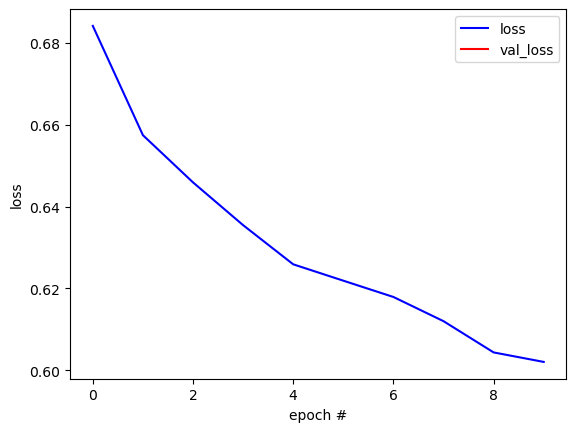

In [10]:
plt.plot(model.history.history['loss'],'b',label='loss')
plt.plot(model.history.history['val_loss'],'r',label='val_loss')

plt.legend()

plt.xlabel('epoch #')
plt.ylabel('loss')
plt.show()

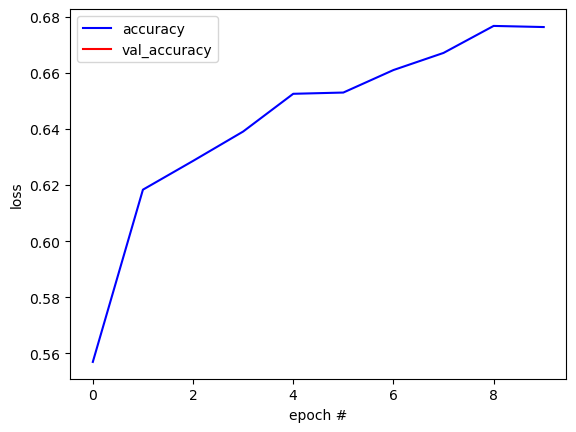

In [11]:
plt.plot(model.history.history['accuracy'],'b',label='accuracy')
plt.plot(model.history.history['val_accuracy'],'r',label='val_accuracy')

plt.legend()

plt.xlabel('epoch #')
plt.ylabel('loss')
plt.show()

In [12]:
predicted_target=model.predict(test_data)

test_labels=np.argmax(test_target,axis=1)

validation_labels=np.argmax(predicted_target,axis=1)

78/78 [==============================] - 1s 9ms/step


In [13]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

print("The accuracy score of Random Forest Classifier is {}".format(accuracy_score(test_labels, validation_labels)))
print()
print("Classification Report:")
print(classification_report(test_labels, validation_labels,target_names=['Cat', 'Dog']))
print()
print("The AUC-ROC score is {}".format(roc_auc_score(test_labels, validation_labels)))

The accuracy score of Random Forest Classifier is 0.7342685370741483

Classification Report:
              precision    recall  f1-score   support

         Cat       0.74      0.72      0.73      1252
         Dog       0.73      0.75      0.74      1243

    accuracy                           0.73      2495
   macro avg       0.73      0.73      0.73      2495
weighted avg       0.73      0.73      0.73      2495


The AUC-ROC score is 0.7343098990127461


In [14]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

matrix=confusion_matrix(test_labels,validation_labels)
print(matrix)

[[905 347]
 [316 927]]


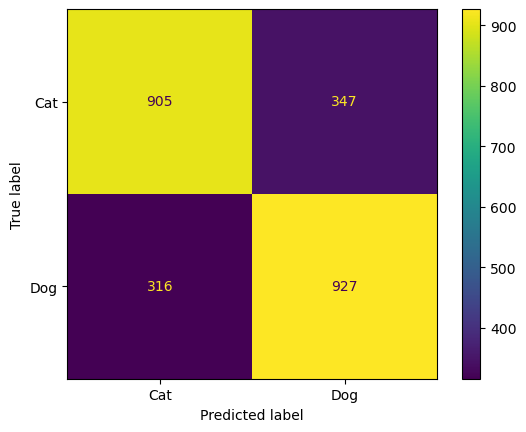

In [15]:
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['Cat', 'Dog'])
disp.plot()